In [ ]:
import collections
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
import math
from google.colab import drive
import pickle

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
def importData(path):
  f = open("/content/drive/My Drive/CAPSTONE COVID DATASET/"+path+".rtf")
  s1 = f.read()
  data = "".join(s1.split("\n")[1:])
  return data

In [ ]:
def getInput2(path):
  f = open("/content/drive/My Drive/CAPSTONE COVID DATASET/"+path+".rtf")
  s1 = f.read()
  d=(s1.split(">"))[1:]
  pool=[]
  for string in d:
    split_list="".join(string.split("\n")[1:])
    split_list=dropN(split_list.upper())
    pool.append(split_list)
  
  return pool

In [ ]:
def dropN(a):
  res=""
  for letter in a:
    if(letter!="N"):
      res+=letter
  return res

In [ ]:
def count_kmers(a,k):
  d=collections.defaultdict(int)
  for i in range(len(a)-k+1):
    d[a[i:i+k]]+=1

  return d

In [ ]:
def count_probability(f,k,N):
  p=collections.defaultdict(float)
  for key in f.keys():
    p[key]=(float)(f[key]/(N-k+1))
  
  return p

In [ ]:
def chaos_game_representation(probabilities, k):
    array_size = int(math.sqrt(4**k))
    chaos = []
    for i in range(array_size):
        chaos.append([0]*array_size)
 
    maxx = array_size
    maxy = array_size
    posx = 1
    posy = 1
    for key, value in probabilities.items():
        for char in key:
            if char == "T":
                posx += maxx / 2
            elif char == "C":
                posy += maxy / 2
            elif char == "G":
                posx += maxx / 2
                posy += maxy / 2
            maxx = maxx / 2
            maxy /= 2
        chaos[(int)(posy)-1][(int)(posx)-1] = value
        maxx = array_size
        maxy = array_size
        posx = 1
        posy = 1
 
    return chaos

In [ ]:
def plotPoints(chaos,path):
  # plt.title('Chaos game representation for 4-mers')
  plt.imshow(chaos, interpolation='nearest', cmap=cm.gray_r)
  plt.savefig('/content/drive/My Drive/CAPSTONE COVID DATASET/COV_Final/'+path+'.png', dpi=300)
  # plt.show()

In [ ]:
def plotPoints2(chaos,path,i):
  # plt.title('Chaos game representation for 4-mers')
  plt.imshow(chaos, interpolation='nearest', cmap=cm.gray_r)
  plt.savefig('/content/drive/My Drive/CAPSTONE COVID DATASET/COV_Final/'+path+str(i)+'.png', dpi=300)
  # plt.show()

##Single FCGR for 100 Rows of Covid

In [ ]:
file="Rows_COV"
data=importData(file)
data=dropN(data.upper())

In [ ]:
frequencies=count_kmers(data,4)
probabilities=count_probability(frequencies,4,len(data))

In [ ]:
chaos=chaos_game_representation(probabilities,4)

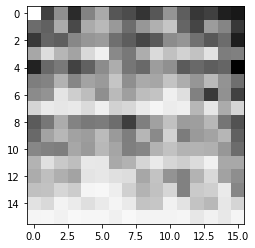

In [ ]:
plotPoints(chaos,"fcgr_"+file)

##Batch FCGR for 100 Rows of COVID

In [ ]:
file="Rows_COV"
pool_old=getInput2(file)

In [ ]:
pool=[]
for i in range(len(pool_old)):
  if(len(pool_old[i])>=5000):
    pool.append(pool_old[i])

In [ ]:
len(pool)

100

10  completed processing.
20  completed processing.
30  completed processing.
40  completed processing.
50  completed processing.
60  completed processing.
70  completed processing.
80  completed processing.
90  completed processing.
100  completed processing.


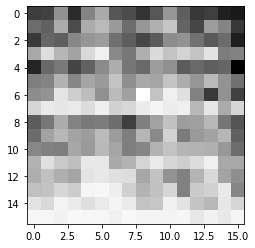

In [ ]:
chaos_pool=[]
k=4
for i in range(100):
  frequencies=count_kmers(pool[i],k)
  probabilities=count_probability(frequencies,k,len(pool[i]))
  chaos=chaos_game_representation(probabilities,k)
  chaos_pool.append(chaos)
  plotPoints2(chaos,file,i)
  if((i+1)%10==0):
    print((i+1)," completed processing.")

In [ ]:
len(chaos_pool)

100

In [ ]:
with open('/content/drive/My Drive/CAPSTONE COVID DATASET/'+file+'/chaos_pool.pkl','wb') as p:
  pickle.dump(chaos_pool,p)

# #to load from pickle files
with open('/content/drive/My Drive/CAPSTONE COVID DATASET/Rows_COV/chaos_pool.pkl', 'rb') as f:
   mynewlist = pickle.load(f)